In [62]:
#this program computes the probability distribution in x for a particle in a harmonic oscillator well at temperature T
#I will use the variable y = x/sqrt(hbar/[M w]).
#psi_0(y) = (1/pi)^(1/4) e^(-y^2/2)  and psi_1 = sqrt(2) y psi_0(y)
#psi_{n+1}(y) = [sqrt(2) y psi_n(y) - sqrt(n) psi_{n-1}]/sqrt(n+1)
#I will use the scaled temperature tau = k T/(hbar w)
#This means the distribution function is P(y) = sum_n prob(n) psi_n^2(y)  for -2 sqrt(tau) <y< 2 sqrt(tau)
#prob(n) = (1/Z) exp(-n hbar w/[k T]) = 1/Z exp(-n/tau)
#Z = 1.0/(1.0 - exp(-1.0/tau))
#
#the classical distribution in x is P_cl(x) = (1.0/sqrt(2.0 pi tau)) exp(-y^2/[2 tau])
#the QM distribution is the same but with tau -> taueff

#numpy allows for most basic math, including complex numbers
import numpy as np
#pyplot is the 'default' choice for plotting in python
import matplotlib.pyplot as plt

#define pi
pi = 2.0*np.asin(1.0)

#set the scaled T
tau = 0.5
#taueff is the effective temperature of the QM harmonic oscillator that gives the exact result for the distribution function
taueff = 0.5 + 1.0/(np.exp(1.0/tau)-1.0)
#estimate the maximum number of l needed
nmaxflt = 36.0*tau
nmax = int(nmaxflt)+2
print(nmax)
prob = np.empty(nmax)
nval = np.empty(nmax)
psi = np.empty(nmax)

#fill the values without the 1/Z term and compute the partition function
partfun = 0.0
n = 0
while n < nmax:
    nval[n] = 1.0*n
    prob[n] = np.exp(-n/tau)
    partfun += prob[n]
    n+=1

#the exact value for the partition function
exactz = 1.0/(1.0 - np.exp(-1.0/tau))
#compare the numerical calculation and the exact partition functions
print('Z =',partfun,exactz)
#include the partition function to convert to probability
n=0
while n < nmax:
    prob[n] = np.exp(-n/tau)/partfun
    n+=1

#now calculate the probability distribution function in y
numy = 1001
y0 = -10.0*np.sqrt(tau)
yf = 10.0*np.sqrt(tau)
dy = (yf-y0)/(numy-1)
pdis = np.empty(numy)
yval = np.empty(numy)
#pdisqm will hold the exact QM position distribution function
pdisqm = np.empty(numy)
#pdiscl will hold the exact classical position distribution function
pdiscl = np.empty(numy)
iy=0
#test1-3 and test are the numerical integral of the n=0,1,2 and the probability distribution (they should all be 1)
test1 = 0.0
test2 = 0.0
test3 = 0.0
test=0.0
while iy < numy:
    yval[iy] = y0 + iy*dy
    y=yval[iy]
    pdiscl[iy] = (1.0/np.sqrt(2.0*pi*tau))*np.exp(-0.5*y*y/tau)
    pdisqm[iy] = (1.0/np.sqrt(2.0*pi*taueff))*np.exp(-0.5*y*y/taueff)
    psi[0]=np.sqrt(np.sqrt(1.0/pi))*np.exp(-0.5*y*y)
    psi[1]=np.sqrt(2.0)*y*psi[0]
    sumn = prob[0]*psi[0]*psi[0]+prob[1]*psi[1]*psi[1]
    n=1
    while n < nmax-1:
        psi[n+1]=(np.sqrt(2.0)*y*psi[n]-np.sqrt((1.0*n))*psi[n-1])/np.sqrt((n+1.0))
        sumn += psi[n+1]*psi[n+1]*prob[n+1]
        n+=1
    pdis[iy] = sumn
    test1+=dy*psi[0]*psi[0]
    test2+=dy*psi[1]*psi[1]
    test3+=dy*psi[2]*psi[2]
    test+=pdis[iy]*dy
    iy+=1

#print out the test of the numerical spatial integrals
print(test1,test2,test3,test)


20
Z = 1.1565176427496657 1.1565176427496657
0.9999999999999994 0.9999999999999996 0.9999999999999992 1.0


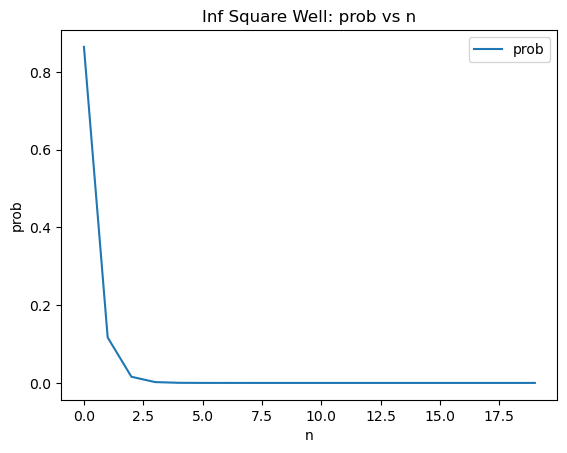

In [63]:
plt.plot(nval,prob,label='prob')
plt.legend()
plt.title('Inf Square Well: prob vs n')
plt.xlabel('n')
plt.ylabel('prob')
plt.show()

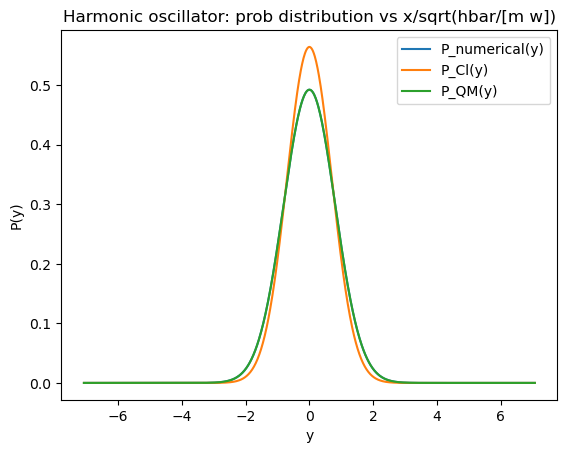

In [64]:
plt.plot(yval,pdis,label='P_numerical(y)')
plt.plot(yval,pdiscl,label='P_Cl(y)')
plt.plot(yval,pdisqm,label='P_QM(y)')
plt.legend()
plt.title('Harmonic oscillator: prob distribution vs x/sqrt(hbar/[m w])')
plt.xlabel('y')
plt.ylabel('P(y)')
plt.show()